<a href="https://colab.research.google.com/github/grovy04/myPython/blob/main/32_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_%EC%99%84%EC%84%B1%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#사이킷런을 활용한 머신러닝


In [ ]:
!pip list

In [ ]:
!pip show sklearn

# 2.로지스틱 회귀(Logistic Regression)의 원리
- https://blog.naver.com/baek2sm/222228604772


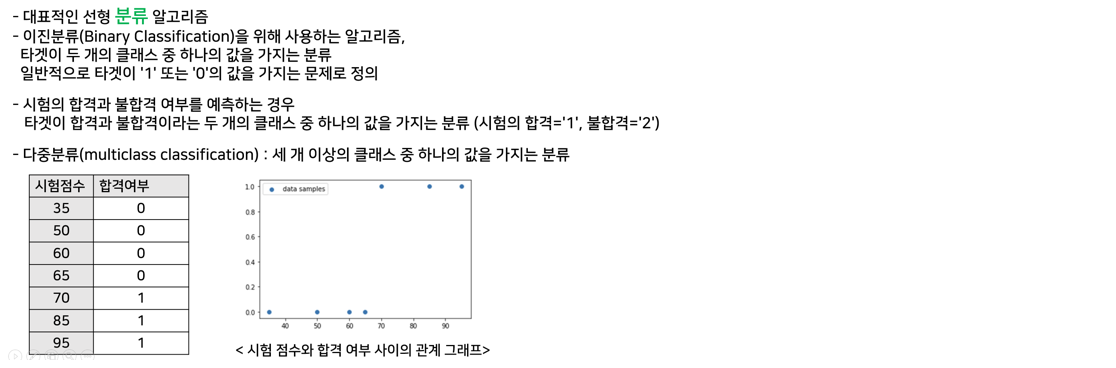

## 시그모이드(Sigmoid) 함수

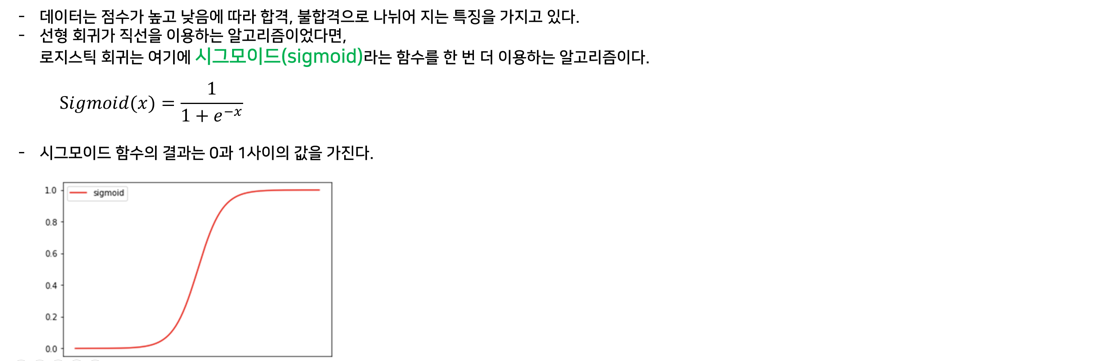

## 시그모이드 함수를 이용한 타겟 예측

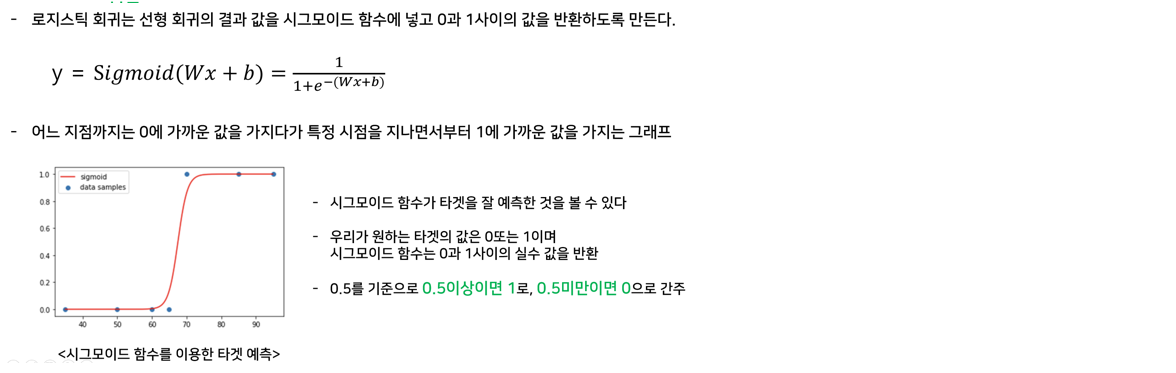

## 로지스틱회귀 실습
  - 아이리스 분류

In [2]:
# 실습에 필요한 패키지 불러오기
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

  - 아이리스 분류를 위한 데이터 세트 가져오기

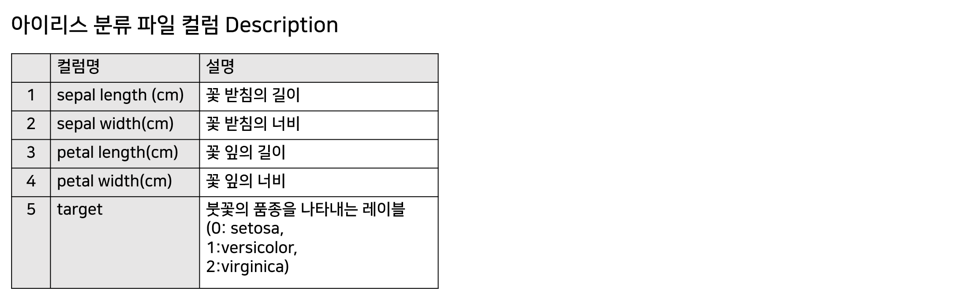

In [10]:
#분류용 샘플 데이터 가져오기
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#입력데이터(독립변수)와 타겟(종속변수)을 준비
X = df.iloc[:, :-1]
y = iris.target
labels = iris.target_names

# #데이터 세트를 학습 데이터와 테스트 데이터로 분할
#동일한 실습결과를 얻을 수 있도록 random_state매개변수를 지정한다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



데이터 범위 조정을 위해 표준화를 적용
  - 선형 회귀 알고리즘도 K-최근접 이웃 알고리즘과 같이 데이터 범위의 영향을 많이 받기 때문에 표준화 전처리 작업을 먼저하고 학습을 진행

  - 훈련 데이터를 기반으로 평균과 표준편차를 계산, 이를 사용하여 데이터를 표준화
  - 표준화는 각 특성(feature)의 평균이 0이 되고 표준편차가 1이 되도록 조정하는 과정
```
scaler.fit_transform(X_train)
```

  - 테스트 데이터세트를 훈련 데이터세트에서 계산된 평균과 표준편차를 사용하여 동일한 비율로 표준화.

  이렇게 하면 훈련 데이터와 테스트 데이터가 동일한 스케일링 파라미터를 사용하게 되므로 모델이 일관된 방식으로 학습 및 예측을 할 수 있다.

  주로 선형 모델이나 신경망과 같이 스케일에 미감한 모델에서 사용됨
  ```
  X_test_std = scaler.transform(X_test)
  ```

In [ ]:
#데이터 범위 조정을 위해 표준화를 적용
scaler = StandardScaler()

#훈련 데이터를 기반으로 평균과 표준편차를 계산, 이를 사용하여 데이터를 표준화
X_train_std = scaler.fit_transform(X_train)

#테스트 데이터세트를 훈련 데이터세트에서 계산된 평균과 표준편차를 사용하여 동일한 비율로 표준화
X_test_std = scaler.transform(X_test)

선형회귀 모델 학습을 위해 LinearRegression 클래스의 객체를 만든다
  - 방금 표준화 전처리 작업ㅇ르 마친 입력 데이터와 타겟을 이용하여 모델을 학습시킴
  - fit메서드를 이용하여 모델을 학습시킴

In [ ]:
#선형 회귀 모델 객체를 만든다
model = LinearRegression()

#선형 회귀 모델에 학습 세트의 입력 데이터와 타겟을 넣고 학습시킨다.
model.fit(X_train_std, y_train)

LinearRegression()

결정계수(R^2, 회귀 모델의 성능을 나타내는 지표 중 하나)
  - 0에서 1까지의 범위를 가짐
  - 높을 수록 모델이 관측 데이터를 잘 설명한 것으로 간주
  - R^2 = 0 : 모델이 종속 변수의 변동을 전혀 설명하지 못함.
    R^2 = 1 : 모델이 종속 변수의 변동을 완전히 설명함.
    0 < R^2 < 1 : 모델이 종속 변수의 변동을 일부 설명함, 값이 클수록 더 설명력이 있는 모델.
    R^2 < 0 : 모델이 관측 데이터를 설명하지 못하고, 평균보다 못한 예측을 수행함.

In [ ]:
#학습 세트에서 결정계수(R^2, 회귀 모델의 성능을 나타내는 지표 중 하나)
#학습 세트에서의 R^2점수와 테스트 세트에서의 R^2점수를 계산
train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

#학습 세트에서의 R^2점수와 테스트 세트에서의 R^2점수를 출력
print(f'학습 세트의 결정계수 - score : {train_score:.3f}')
print(f'테스트 세트의 결정계수 - score : {test_score:.3f}')

학습 세트의 결정계수 - score : 0.717
테스트 세트의 결정계수 - score : 0.779


학습 세트의 결정계수보다 테스트 세트의 결정계수가 높은 것으로보아 일반화가 잘 된 케이스

학습된 모델을 활용해 입력 데이터를 다시 넣고 예측해보기

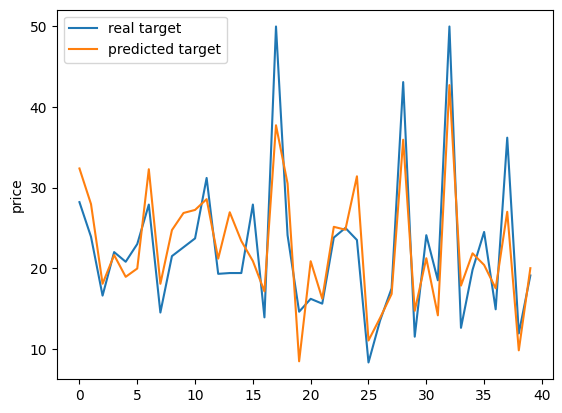

In [ ]:
#학습된 모델에 테스트 세트의 입력 데이터를 다시 넣고 타겟을 예측
y_predicted = model.predict(X_test_std)

#실제값과 예측값 사이의 관계를 꺽은 선 그래프로 그린다.
number_of_sample = 40
plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('price')
plt.legend()
plt.show()

출력된 그래프를 봐도 학습된 선형 회귀 모델이 주택 가격을 잘 예측하고 있는 것으로 보인다.

이처럼 선형 회귀 알고리즘은 간단하지만 입력 데이터의 특성이 많은 경우 선형 회귀 알고리즘을 사용하면 제법 좋은 결과를 얻을 수 있다.

선형 회귀 모델에서 학습된 계수와 y절편을 확인하려면 다음과 같이 모델의 coef_속성과 intercept_속성을 이용하면 된다.

학습된 선형 회귀 모델은 입력 데이터의 특성 개수가 13개인 다중 선형 회귀 모델이기 때문에 특성 개수만큼 13개의 계수가 학습되었다.

실행 결과를 보면 학습된 13개의 계수 값과 y절편을 확인할 수 있다.

In [ ]:
#학습된 계수(기울기, coefficient)를 확인
print(f'계수(coefficient) : {model.coef_}')

#학습된 계수(기울기, coefficient)를 확인
print(f'절편(y_intercept) : {model.intercept_}')

계수(coefficient) : [[-1.07145146  1.34036243  0.26298069  0.66554537 -2.49842551  1.97524314
   0.19516605 -3.14274974  2.66736136 -1.80685572 -2.13034748  0.56172933
  -4.03223518]]
절편(y_intercept) : [22.34459103]


In [ ]:
#실행하지 않음, 지우지는 말 것...

#사이킷런에서 보스턴 주택 가격 데이터 세트를 불러온다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

#입력데이터(독립변수)와 타겟(종속변수)을 준비
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

#데이터 세트를 학습 데이터와 테스트 데이터로 분할
#동일한 실습결과를 얻을 수 있도록 random_state매개변수를 지정한다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
